# Exemplo da utilização do K-means com os simpsons

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [8]:
df = pd.read_csv('data/simpsons.csv',sep=";")

In [9]:
df.head()

,Personagem,Cabelo,Peso,Idade
0,Homer,0.00,114,36
1,Marge,25.40,68,34
2,Bart,5.08,40,9
3,Lisa,15.24,35,7
4,Maggie,10.16,9,1


In [12]:
df.shape

(9, 4)

In [10]:
df.describe()

,Cabelo,Peso,Idade
count,9.000000,9.000000,9.000000
mean,13.264444,65.111111,30.888889
std,9.484934,31.907853,21.797044
min,0.000000,9.000000,1.000000
25%,5.080000,40.000000,9.000000
50%,15.240000,72.000000,36.000000
75%,20.320000,81.000000,40.000000
max,25.400000,114.000000,70.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Personagem  9 non-null      object 
 1   Cabelo      9 non-null      float64
 2   Peso        9 non-null      int64  
 3   Idade       9 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 416.0+ bytes


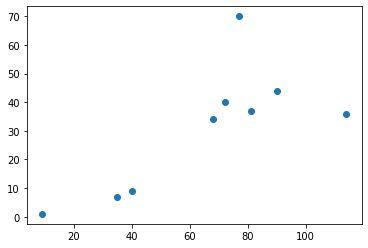

In [34]:
plt.scatter(df.Peso,df.Idade)

## Implementando K-means

In [17]:
kmeans=KMeans(n_clusters=3)


In [18]:
# Treinando o modelo e retirando a coluna com o nome dos personagens
kmeans.fit(df.drop('Personagem',axis=1))


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
# Quais são as posições dos centróides?
kmeans.cluster_centers_


array([[ 17.78      ,  77.6       ,  45.        ],
       [ 10.16      ,  28.        ,   5.66666667],
       [  0.        , 114.        ,  36.        ]])

In [21]:
# Quais foram as classes criadas?
kmeans.labels_


array([2, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int32)

In [25]:
df['cluster_'] = kmeans.labels_


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Idade')

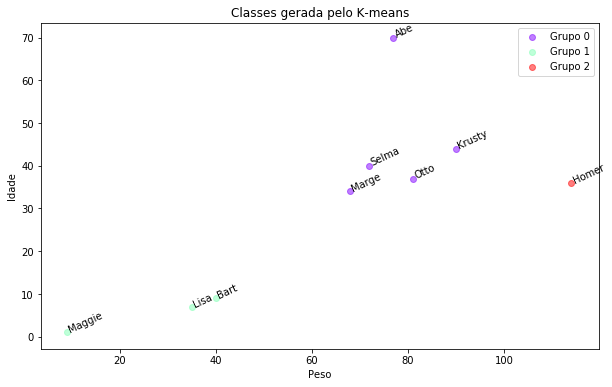

In [35]:
import matplotlib.cm as cm
import numpy as np
n_clusters = max(kmeans.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))
# Cria uma figura de tamanho 6x4 polegadas
plt.figure(figsize=(10,6))
for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset['Peso'][i], subset['Idade'][i],str(subset['Personagem'][i]), rotation=25) 
    plt.scatter(subset['Peso'], subset['Idade'], c=color, label='Grupo '+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Classes gerada pelo K-means')
plt.xlabel('Peso')
plt.ylabel('Idade')

In [36]:
kmeans.inertia_

2126.769066666667

In [39]:
# Criamos um for que vai fazer uma série de testes com numeros diferentes da qtd de clusters, 
# e com isso ele irá calcular o valor da inertia, e vamos adicionando esse valor no vetor "Sum_of_squared_distances"
df_final = df.drop('Personagem',axis=1)
Sum_of_squared_distances = []
K = range(2,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_final)
    Sum_of_squared_distances.append(km.inertia_)



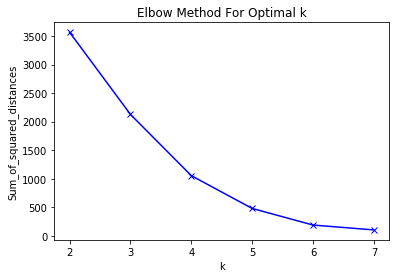

In [40]:
# Vamos plotar o resultado
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Talvez o cotovelo esteja no 4

In [55]:
kmeans_2=KMeans(n_clusters=4)
kmeans_2.fit(df_final)
df['cluster_'] = kmeans_2.labels_


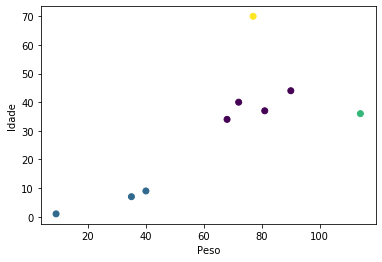

In [59]:
plt.xlabel('Peso')
plt.ylabel('Idade')
plt.scatter(df['Peso'], df['Idade'], c=df['cluster_'])